In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('Purples')

In [2]:
import tensorflow as tf

In [3]:
npz=np.load('Audiobooks_train_data1.npz')
train_input=npz['inputs'].astype(np.float)
train_target=npz['target'].astype(np.int)
train_input

array([[2.4432e+04, 2.1600e+03, 2.1600e+03, ..., 0.0000e+00, 0.0000e+00,
        2.0600e+02],
       [3.2104e+04, 2.1600e+03, 2.1600e+03, ..., 2.5920e+02, 0.0000e+00,
        2.1200e+02],
       [2.6469e+04, 5.4000e+02, 5.4000e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [3.1990e+04, 2.1600e+03, 2.1600e+03, ..., 2.5920e+02, 0.0000e+00,
        2.9000e+01],
       [1.9677e+04, 1.6200e+03, 1.6200e+03, ..., 6.4800e+01, 0.0000e+00,
        1.8100e+02],
       [2.1505e+04, 2.1600e+03, 2.1600e+03, ..., 5.6700e+02, 2.0000e+00,
        1.2700e+02]])

In [4]:
npv=np.load('Audiobooks_valid_data1.npz')
valid_input=npv['inputs'].astype(np.float)
valid_target=npv['target'].astype(np.int)

In [5]:
npx=np.load('Audiobooks_test_data1.npz')
test_input=npz['inputs'].astype(np.float)
test_target=npz['target'].astype(np.int)

In [6]:
input_size=10
output_size=2
hidden_layer_size=100

model=tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
     tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

batch_size=100
max_epoch=100
early_stopping=tf.keras.callbacks.EarlyStopping(patience=2)
model.fit(train_input,
          train_target,
          batch_size=batch_size,
          epochs=max_epoch,
          callbacks=[early_stopping],
          validation_data=(valid_input,valid_target),
          verbose=2
)

Epoch 1/100
36/36 - 2s - loss: 54.7947 - accuracy: 0.6452 - val_loss: 52.3318 - val_accuracy: 0.5817
Epoch 2/100
36/36 - 0s - loss: 15.9768 - accuracy: 0.7863 - val_loss: 6.9830 - val_accuracy: 0.8031
Epoch 3/100
36/36 - 1s - loss: 9.4015 - accuracy: 0.7879 - val_loss: 10.4039 - val_accuracy: 0.6980
Epoch 4/100
36/36 - 0s - loss: 8.1038 - accuracy: 0.8248 - val_loss: 4.4423 - val_accuracy: 0.9105
Epoch 5/100
36/36 - 1s - loss: 5.1656 - accuracy: 0.8516 - val_loss: 4.0003 - val_accuracy: 0.7987
Epoch 6/100
36/36 - 1s - loss: 4.2232 - accuracy: 0.8511 - val_loss: 2.5491 - val_accuracy: 0.8792
Epoch 7/100
36/36 - 0s - loss: 6.0785 - accuracy: 0.8284 - val_loss: 3.1612 - val_accuracy: 0.9172
Epoch 8/100
36/36 - 0s - loss: 10.0981 - accuracy: 0.7985 - val_loss: 4.9384 - val_accuracy: 0.9217


In [7]:
test_loss,test_accuracy=model.evaluate(test_input,test_target)

112/112 [==============================] - 1s 6ms/step - loss: 5.0390 - accuracy: 0.9081


In [8]:
predict=model.predict_classes(test_input)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [9]:
predict

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
cm=confusion_matrix(predict,test_target)

In [12]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [13]:
def scores(predict,test_target):
    p=precision_score(predict,test_target)
    r=recall_score(predict,test_target)
    f=f1_score(predict,test_target)
    return p,r,f

In [14]:
scores(predict,test_target)

(0.8708425720620843, 0.9424115176964607, 0.9052146355517142)

In [15]:
from sklearn.metrics import precision_recall_curve

In [16]:
precision,recall,threshold=precision_recall_curve(predict,test_target)

In [17]:
def plot_precision_recall_curve(precision,recall,threshold):
    plt.plot(threshold,precision[:-1],'g-',label='Precision')
    plt.plot(threshold,recall[:-1],'b--',label='Recall')
    plt.xlabel('Thresholds')
    plt.title('Precision Recall Curve')

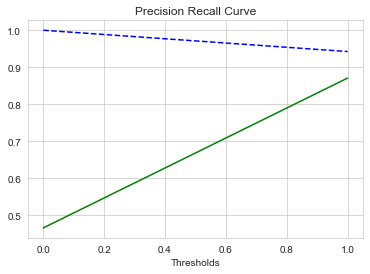

In [18]:
plot_precision_recall_curve(precision,recall,threshold)
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_target,predict)
cm

array([[1679,   96],
       [ 233, 1571]], dtype=int64)